# Introduction 

In [102]:
import pandas as pd
import numpy as np
import prince

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

from ydata_profiling import ProfileReport

import scipy.stats as stats

📊 Contenu
🔹 Attributs des données
👤 Clients

    ID : Identifiant unique du client
    Year_Birth : Année de naissance du client
    Education : Niveau d’éducation
    Marital_Status : État matrimonial
    Income : Revenu annuel du ménage
    Kidhome : Nombre d’enfants dans le foyer
    Teenhome : Nombre d’adolescents dans le foyer
    Dt_Customer : Date d’adhésion du client à l’entreprise
    Recency : Nombre de jours depuis le dernier achat
    Complain : 1 si le client a fait une réclamation dans les 2 dernières années, 0 sinon

🛒 Produits

    MntWines : Dépenses en vin sur les 2 dernières années
    MntFruits : Dépenses en fruits sur les 2 dernières années
    MntMeatProducts : Dépenses en viande sur les 2 dernières années
    MntFishProducts : Dépenses en poisson sur les 2 dernières années
    MntSweetProducts : Dépenses en sucreries sur les 2 dernières années
    MntGoldProds : Dépenses en or sur les 2 dernières années

📢 Promotions

    NumDealsPurchases : Nombre d’achats réalisés avec une réduction
    AcceptedCmp1 : 1 si le client a accepté l’offre de la 1ʳᵉ campagne, 0 sinon
    AcceptedCmp2 : 1 si le client a accepté l’offre de la 2ᵉ campagne, 0 sinon
    AcceptedCmp3 : 1 si le client a accepté l’offre de la 3ᵉ campagne, 0 sinon
    AcceptedCmp4 : 1 si le client a accepté l’offre de la 4ᵉ campagne, 0 sinon
    AcceptedCmp5 : 1 si le client a accepté l’offre de la 5ᵉ campagne, 0 sinon
    Response : 1 si le client a accepté l’offre de la dernière campagne, 0 sinon

📍 Canaux d'achat

    NumWebPurchases : Nombre d’achats effectués sur le site web
    NumCatalogPurchases : Nombre d’achats réalisés via un catalogue
    NumStorePurchases : Nombre d’achats effectués en magasin
    NumWebVisitsMonth : Nombre de visites sur le site web de l’entreprise au cours du dernier mois

# I) Statistique descriptive / Exploration des variables

## 1) Prise en charge des données : Vérification de la nature des différentes variables et leur encodage. Convertion des variables qualitatives.

In [2]:
marketing = pd.read_csv("marketing_campaign.csv", encoding="utf-8", sep= "\t")

In [3]:
#On affiche les premières lignes pour se familiariser avec le jeu de données et identifier les données quali/quanti ...
marketing.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [4]:
marketing.shape

(2240, 29)

In [5]:
#Affichage des colonnes: 
marketing.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

On remarque que les colonnes 'Z_CostContact' et 'Z_Revenue' contiennent les mêmes valeurs pour tous les individus et on conclut que ces données nous ne seront pas utiles pour l'analyse que l'on veut effectuer dans le cadre de ce projet. On les retire donc de notre dataset

In [6]:
marketing.drop(['Z_CostContact','Z_Revenue'], axis=1, inplace=True)

In [7]:
#On vérifie: 216
marketing.shape

(2240, 27)

In [8]:
#Obtenir des infos sur les types de données et valeurs manquantes
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Il manque des valeurs pour Income => 2 choix s'offrent à nous : 
1) Supprimer les lignes concernées
2) Faire une moyenne des autres valeurs de Income et on les associe aux valeurs manquantes.

Ici, le choix le plus pertinent semble le choix 2). En effet, on dispose de 2216 variables sur 2240 et donc de suffisamment de variable 
pour estimer la moyenne de façon précise (estimateur sans biais : la moyenne empirique).

In [9]:
print('Income - Nombre de valeurs manquantes:', marketing['Income'].isnull().sum())
#On ajoute la médiane pour les valeurs manquantes et non pas la moyenne car la médiane correspond à la valeur centrale de notre jeu de données
#On évite ainsi tout risque de fortes influences sur la moyenne par des valeurs extrêmes (outliers)
print('Income - Valeur médiane: ', marketing['Income'].median())
marketing.fillna({'Income': marketing['Income'].median()}, inplace=True)

Income - Nombre de valeurs manquantes: 24
Income - Valeur médiane:  51381.5


On transforme les quali en quanti et on renomme lorsque c'est pertinent

In [10]:
print(marketing['Education'].value_counts())

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


In [11]:
marketing['Education'] = marketing['Education'].astype('category')
marketing['Marital_Status'] = marketing['Marital_Status'].astype('category')
marketing['Kidhome'] = marketing['Kidhome'].astype('category')
marketing['Teenhome'] = marketing['Teenhome'].astype('category')

#Il est préférable de convertir la colonne Dt_Customer en type datetime pour faciliter les analyses et les manipulations
marketing['Dt_Customer'] = pd.to_datetime(marketing['Dt_Customer'], format='%d-%m-%Y')

In [12]:
nb_conflits = ((marketing['AcceptedCmp1'] == 1) & (marketing['AcceptedCmp2'] == 1)).sum()
print(f"Nombre de cas où AcceptedCmp1 et AcceptedCmp2 valent 1 en même temps : {nb_conflits}")
print("On ne peut donc pas transformer mes variables AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5 en une variable AcceptedCmp qui prend 1,2,3,4 ou 5")

Nombre de cas où AcceptedCmp1 et AcceptedCmp2 valent 1 en même temps : 13
On ne peut donc pas transformer mes variables AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5 en une variable AcceptedCmp qui prend 1,2,3,4 ou 5


In [13]:
marketing['AcceptedCmp1'] = marketing['AcceptedCmp1'].astype('category')
marketing['AcceptedCmp1'] = marketing['AcceptedCmp1'].cat.rename_categories({0: 'No', 1:'Yes'})
marketing['AcceptedCmp2'] = marketing['AcceptedCmp2'].astype('category')
marketing['AcceptedCmp2'] = marketing['AcceptedCmp2'].cat.rename_categories({0: 'No', 1:'Yes'})
marketing['AcceptedCmp3'] = marketing['AcceptedCmp3'].astype('category')
marketing['AcceptedCmp3'] = marketing['AcceptedCmp3'].cat.rename_categories({0: 'No', 1:'Yes'})
marketing['AcceptedCmp4'] = marketing['AcceptedCmp4'].astype('category')
marketing['AcceptedCmp4'] = marketing['AcceptedCmp4'].cat.rename_categories({0: 'No', 1:'Yes'})
marketing['AcceptedCmp5'] = marketing['AcceptedCmp5'].astype('category')
marketing['AcceptedCmp5'] = marketing['AcceptedCmp5'].cat.rename_categories({0: 'No', 1:'Yes'})
marketing['Complain'] = marketing['Complain'].astype('category')
marketing['Complain'] = marketing['Complain'].cat.rename_categories({0: 'No', 1:'Yes'})
marketing['Response'] = marketing['Response'].astype('category')
marketing['Response'] = marketing['Response'].cat.rename_categories({0: 'No', 1:'Yes'})

## 2) Exploration par une analyse descriptive unidimensionnelle des données.

### 2.1) Données quantitatives 

#### a) Clients : 

##### i) Income

<Axes: xlabel='Income', ylabel='Count'>

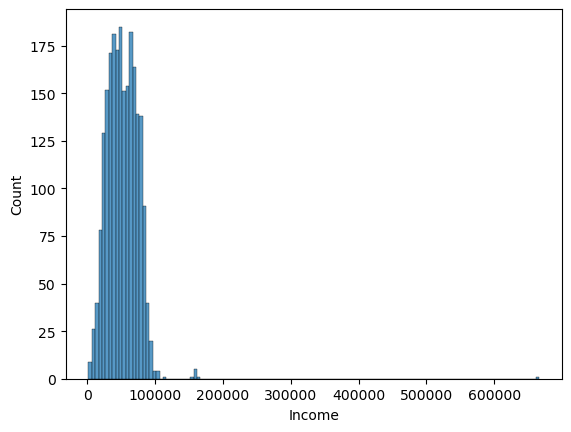

In [14]:
sns.histplot(marketing['Income'], kde=False)

In [15]:
riche = marketing.loc[marketing['Income'] > 6e5, 'ID']
print(riche)

#2233 c'est le numéro de la ligne

2233    9432
Name: ID, dtype: int64


{'whiskers': [<matplotlib.lines.Line2D at 0x15a28621430>,
 'caps': [<matplotlib.lines.Line2D at 0x15a289247a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15a288dfef0>],
 'medians': [<matplotlib.lines.Line2D at 0x15a28924dd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x15a289250a0>],
 'means': []}

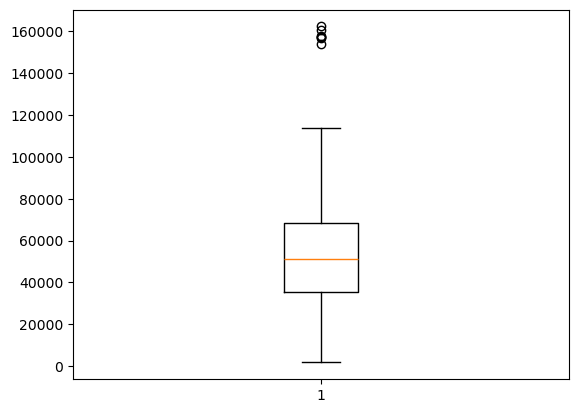

In [16]:
marketing = marketing.drop(marketing[marketing['ID'] == 9432].index)
plt.boxplot(marketing['Income'])

Est ce qu'on retire les 3 points ?

##### ii) Year Birth

Nombre de vieux : 3
Il n'y en a que 3 donc on les retire car cela n'a pas de sens de garder des gens qui sont nés avant 1905 et qui ne sont surement plus en vie


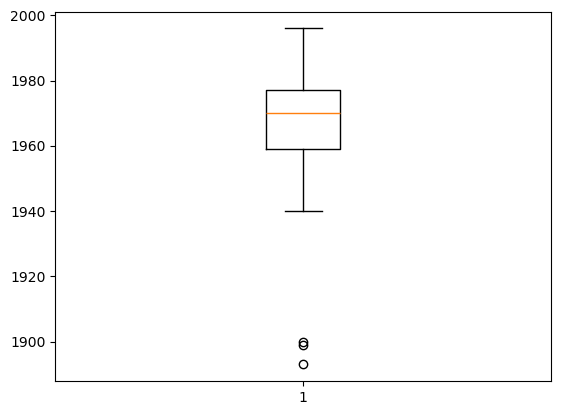

In [17]:
plt.boxplot(marketing['Year_Birth'])
nb_vieux = (marketing['Year_Birth'] < 1920).sum()
print(f"Nombre de vieux : {nb_vieux}")
print("Il n'y en a que 3 donc on les retire car cela n'a pas de sens de garder des gens qui sont nés avant 1905 et qui ne sont surement plus en vie")

In [18]:
vieux = marketing.loc[marketing['Year_Birth'] < 1920, 'ID']
for i in vieux: 
    marketing = marketing.drop(marketing[marketing['ID'] == i].index)

(array([ 23., 155., 241., 276., 254., 437., 419., 201., 177.,  43.]),
 array([1940. , 1945.6, 1951.2, 1956.8, 1962.4, 1968. , 1973.6, 1979.2,
        1984.8, 1990.4, 1996. ]),
 <BarContainer object of 10 artists>)

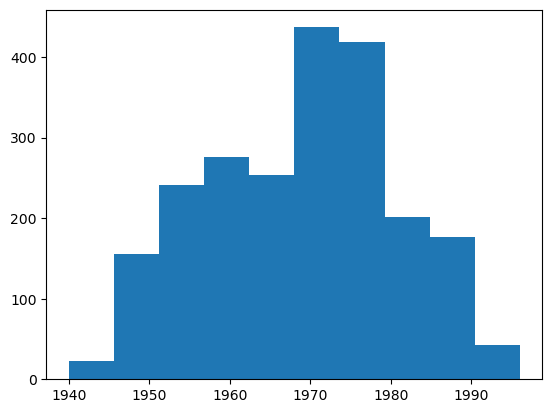

In [42]:
plt.hist(marketing["Year_Birth"])

In [43]:
print(marketing["Year_Birth"].max())

1996


On transforme Year_Birth en tranche d'âge "18-25", "26-35", "36-45", "46-55", "56-65", ">66" (il n'y a pas de tranche d'âge <18 car le personne la plus jeune a 19 ans)

In [44]:
marketing["Age_Categorie"] = pd.cut(
    2015 - marketing["Year_Birth"],  # On calcule l'âge
    bins=[18, 25, 35, 45, 55, 65, float('inf')],  # Définition des tranches d'âge
    labels=["Age_18-25", "Age_26-35", "Age_36-45", "Age_46-55", "Age_56-65", "Age_>66"],  # Noms des catégories
    right=True  # Inclut la borne supérieure dans l'intervalle
)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Age_18-25'),
  Text(1, 0, 'Age_26-35'),
  Text(2, 0, 'Age_36-45'),
  Text(3, 0, 'Age_46-55'),
  Text(4, 0, 'Age_56-65'),
  Text(5, 0, 'Age_>66')])

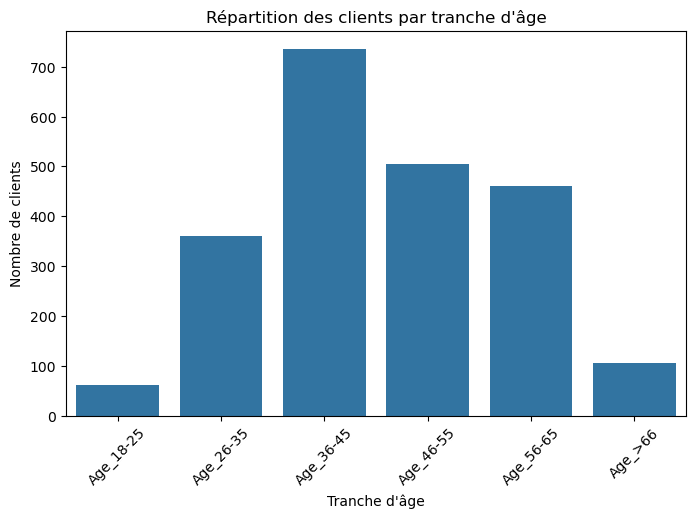

In [45]:
plt.figure(figsize=(8, 5))  # Ajuster la taille du graphique
sns.countplot(data=marketing, x="Age_Categorie", order=["Age_18-25", "Age_26-35", "Age_36-45", "Age_46-55", "Age_56-65", "Age_>66"])

plt.title("Répartition des clients par tranche d'âge")
plt.xlabel("Tranche d'âge")
plt.ylabel("Nombre de clients")
plt.xticks(rotation=45)  # Incliner les labels si besoin

In [46]:
marketing.drop(['Year_Birth'], axis=1, inplace=True)

#### b) Produits

##### i) Wines

{'whiskers': [<matplotlib.lines.Line2D at 0x15a289c3bc0>,
 'caps': [<matplotlib.lines.Line2D at 0x15a287cc0e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15a289c3950>],
 'medians': [<matplotlib.lines.Line2D at 0x15a287cc6b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x15a287cc950>],
 'means': []}

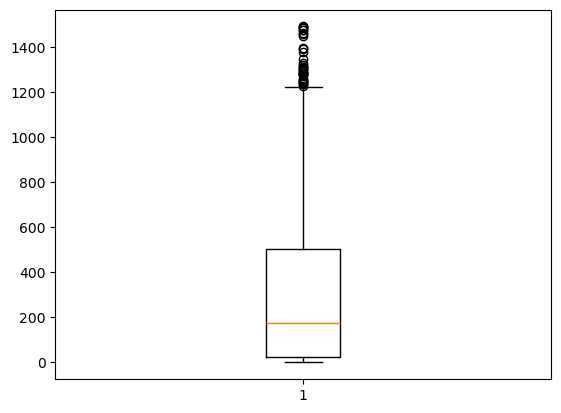

In [19]:
plt.boxplot(marketing['MntWines'])

In [20]:
nb_alcooliques = (marketing['MntWines'] > 1200).sum()
print(f"Nombre d'alcooliques : {nb_alcooliques}")
print("Il y en a beacoup, on les laisse")

Nombre d'alcooliques : 42
Il y en a beacoup, on les laisse


##### ii) Fruits

<Axes: xlabel='MntFruits', ylabel='Count'>

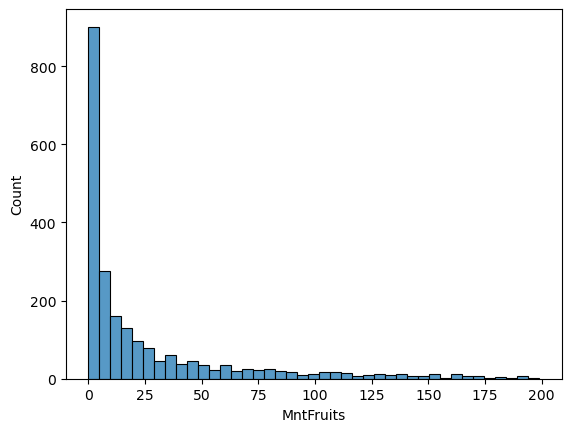

In [21]:
sns.histplot(marketing['MntFruits'], kde=False)

On garde tout

##### iii) Meat

{'whiskers': [<matplotlib.lines.Line2D at 0x15a289fe540>,
 'caps': [<matplotlib.lines.Line2D at 0x15a289feb70>,
 'boxes': [<matplotlib.lines.Line2D at 0x15a289fe2d0>],
 'medians': [<matplotlib.lines.Line2D at 0x15a289ff080>],
 'fliers': [<matplotlib.lines.Line2D at 0x15a289ff350>],
 'means': []}

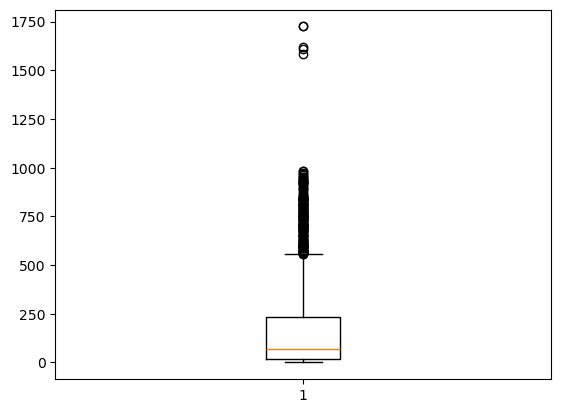

In [22]:
plt.boxplot(marketing['MntMeatProducts'])

In [23]:
viandards = marketing.loc[marketing['MntMeatProducts'] > 1500, 'ID']
for i in viandards: 
    marketing = marketing.drop(marketing[marketing['ID'] == i].index)

##### iv) Fish

<Axes: xlabel='MntFishProducts', ylabel='Count'>

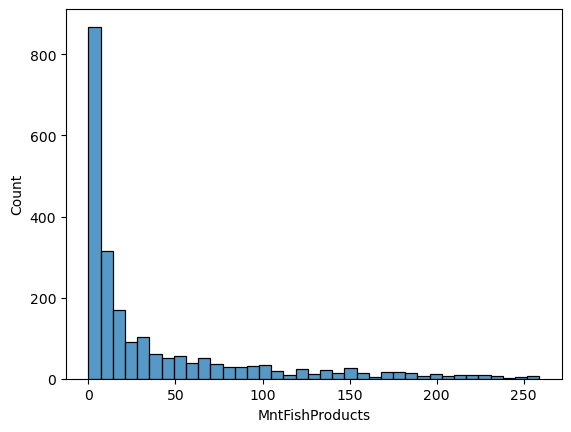

In [25]:
sns.histplot(marketing['MntFishProducts'], kde=False)

##### v) Sweet

{'whiskers': [<matplotlib.lines.Line2D at 0x15a28b71df0>,
 'caps': [<matplotlib.lines.Line2D at 0x15a28aaf6b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15a28b71ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x15a28b72870>],
 'fliers': [<matplotlib.lines.Line2D at 0x15a28b72b40>],
 'means': []}

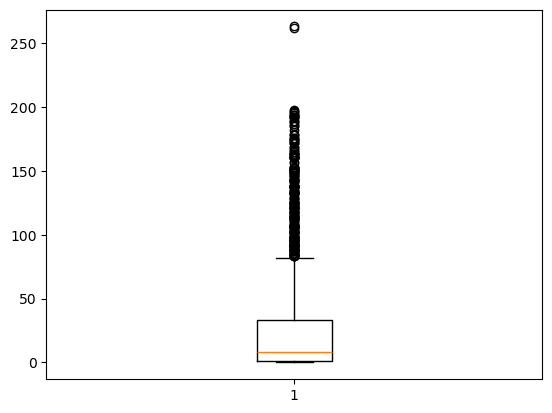

In [26]:
plt.boxplot(marketing['MntSweetProducts'])

In [27]:
gourmands = marketing.loc[marketing['MntSweetProducts'] > 225, 'ID']
#print(gourmands)
for i in gourmands: 
    marketing = marketing.drop(marketing[marketing['ID'] == i].index)

##### vi) Gold

{'whiskers': [<matplotlib.lines.Line2D at 0x15a28bbba10>,
 'caps': [<matplotlib.lines.Line2D at 0x15a28bbbfb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15a28bbb7d0>],
 'medians': [<matplotlib.lines.Line2D at 0x15a29c00560>],
 'fliers': [<matplotlib.lines.Line2D at 0x15a29c007d0>],
 'means': []}

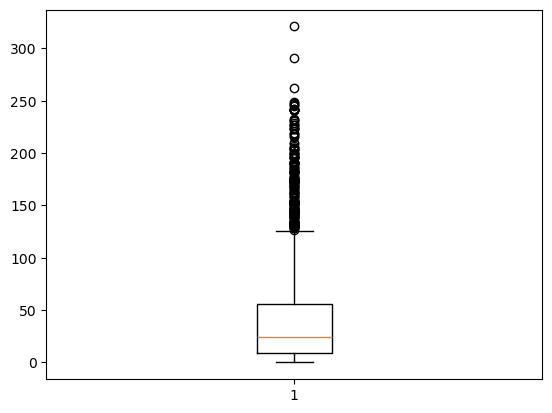

In [28]:
plt.boxplot(marketing['MntGoldProds'])

In [29]:
for i in range(3):
    marketing = marketing.drop(marketing['MntGoldProds'].idxmax())
#On retire les 3 premiers parce que j'arrive pas à voir quel est la valeur du seuil. Par contre, il faut pas le run 

#### c) Promotions

{'whiskers': [<matplotlib.lines.Line2D at 0x15a28a24bf0>,
 'caps': [<matplotlib.lines.Line2D at 0x15a28a27b30>,
 'boxes': [<matplotlib.lines.Line2D at 0x15a289dce60>],
 'medians': [<matplotlib.lines.Line2D at 0x15a28897470>],
 'fliers': [<matplotlib.lines.Line2D at 0x15a288943e0>],
 'means': []}

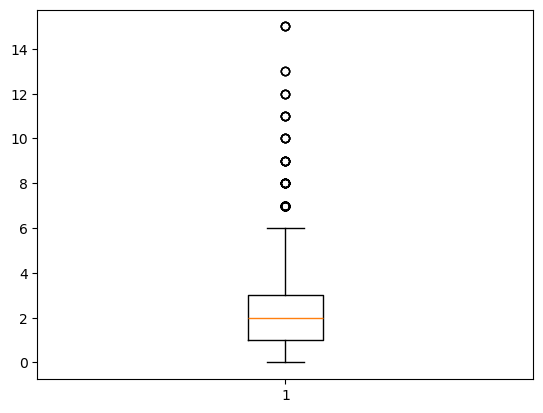

In [30]:
plt.boxplot(marketing['NumDealsPurchases'])

In [31]:
print("Pour l'instant, on décide de tout garder car les valeurs ne nous semble pas aberrantes")

Pour l'instant, on décide de tout garder car les valeurs ne nous semble pas aberrantes


#### d) Canaux d'achats

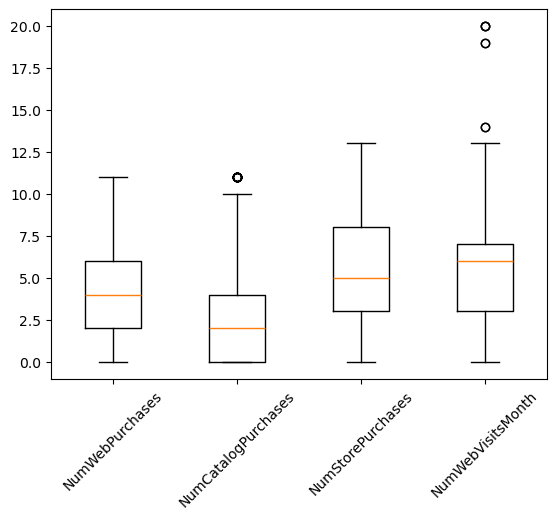

In [32]:
# Créer deux boxplots côte à côte
plt.boxplot([marketing['NumWebPurchases'], marketing['NumCatalogPurchases'], marketing['NumStorePurchases'], marketing['NumWebVisitsMonth']], positions=[1, 2, 3, 4])

# Ajouter des labels sur l'axe x pour chaque boxplot
plt.xticks([1, 2, 3, 4], ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'])

# Afficher le graphique
plt.xticks(rotation=45) #permet d'orienter la légende
plt.show()

On garde tout, c'est pas aberrant

**Rq :** On crée 2 variables Depenses totales et total du nb d'achat 

In [63]:
marketing['Depense_Total']= marketing[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
marketing['Total_Achat'] = marketing[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

In [64]:
marketing[['Depense_Total', 'Total_Achat']].describe()

Depense_Total  Total_Achat
count    2226.000000  2226.000000
mean      603.980234    12.506739
std       600.907193     7.166100
min         5.000000     0.000000
25%        68.250000     6.000000
50%       396.000000    12.000000
75%      1042.750000    18.000000
max      2525.000000    32.000000

In [65]:
nbr_individu_zero_achat = marketing[marketing['Total_Achat'] == 0].shape[0]
print(nbr_individu_zero_achat)

6


In [66]:
individus_zero_achat = marketing[marketing['Total_Achat'] == 0]

# Afficher chaque individu avec toutes ses variables
for index, row in individus_zero_achat.iterrows():
    print(row)  # Affiche toutes les variables (colonnes) pour chaque individu
    print()  # Ajouter une ligne vide pour séparer les individus

ID                                    5555
Marital_Status                     Divorcé
Income                            153924.0
Dt_Customer            2014-02-07 00:00:00
Recency                                 81
MntWines                                 1
MntFruits                                1
MntMeatProducts                          1
MntFishProducts                          1
MntSweetProducts                         1
MntGoldProds                             1
NumDealsPurchases                        0
NumWebPurchases                          0
NumCatalogPurchases                      0
NumStorePurchases                        0
NumWebVisitsMonth                        0
AcceptedCmp3                            No
AcceptedCmp4                            No
AcceptedCmp5                            No
AcceptedCmp1                            No
AcceptedCmp2                            No
Complain                                No
Response                                No
Age_Categor

Ici, on remarque un truc bizarre. Le minimum de Total_Achat est a 0 alors que le minimum de Depense_Total est à 5. Il y a des individus qui ont fait 0 achat mais qui ont quand meme depense, comment cela est possible?
On a différentes idées : 
- Il y a d'autres moyens d'achats que en magasin ou en ligne sur le site web ou via le catalogue
- Il y a peut etre des valeurs manquantes ans les colonnes NumWebPurchases, NumCatalogPurchases, et NumStorePurchases

In [67]:
print(marketing[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].isnull().sum())

NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
dtype: int64


Pas de valeurs manquantes : je suppose pour l'instant que il y a d'autres façons d'acheter qui ne sont pas prises en compte, on pourrait essayer d'identifier de nouvelles sources de données ou de nouvelles colonnes qui pourraient être liées aux dépenses de ces individus.

### 2.2) Données qualitatives 

In [371]:
print(marketing.dtypes)

ID                              int64
Year_Birth                      int64
Education                    category
Marital_Status               category
Income                        float64
Kidhome                      category
Teenhome                     category
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                 category
AcceptedCmp4                 category
AcceptedCmp5                 category
AcceptedCmp1                 category
AcceptedCmp2                 category
Complain                     category
Response    

In [33]:
# Vérifier les valeurs manquantes pour toutes les variables de type category
print(marketing.select_dtypes(include='category').isnull().sum())

Education         0
Marital_Status    0
Kidhome           0
Teenhome          0
AcceptedCmp3      0
AcceptedCmp4      0
AcceptedCmp5      0
AcceptedCmp1      0
AcceptedCmp2      0
Complain          0
Response          0
dtype: int64


Aucune valeur manquante

Pour chacune des variables qualitatives, on s'intéresse à leurs modalités et aux fréquences de ces modalités

In [41]:
for col in marketing.select_dtypes(include=['category']).columns:
    print(f"Modalités de la variable {col} :")
    print(marketing[col].value_counts())
    print("\n")

Modalités de la variable Education :
Education
Graduation    1122
PhD            481
Master         369
2n Cycle       200
Basic           54
Name: count, dtype: int64


Modalités de la variable Marital_Status :
Marital_Status
Married     860
Together    576
Single      475
Divorced    231
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


Modalités de la variable Kidhome :
Kidhome
0    1283
1     895
2      48
Name: count, dtype: int64


Modalités de la variable Teenhome :
Teenhome
0    1148
1    1027
2      51
Name: count, dtype: int64


Modalités de la variable AcceptedCmp3 :
AcceptedCmp3
No     2063
Yes     163
Name: count, dtype: int64


Modalités de la variable AcceptedCmp4 :
AcceptedCmp4
No     2060
Yes     166
Name: count, dtype: int64


Modalités de la variable AcceptedCmp5 :
AcceptedCmp5
No     2064
Yes     162
Name: count, dtype: int64


Modalités de la variable AcceptedCmp1 :
AcceptedCmp1
No     2082
Yes     144
Name: count, dtype: i

#### a) Marital Status

In [47]:
marketing['Marital_Status'] = marketing['Marital_Status'].replace({
    'YOLO': None,  # Retirer YOLO
    'Absurd': None,  # Retirer Absurd
    'Married': 'Couple',  # Réunir Married et Together dans 'Couple'
    'Together': 'Couple',
    'Single': 'Seule',  # Réunir Single, Alone, Widow dans 'Seule'
    'Alone': 'Seule',
    'Widow': 'Seule',
    'Divorced': 'Divorcé'  # Garder Divorced sous 'Divorcé'
})

C:\Users\qtoui\AppData\Local\Temp\ipykernel_4924\3683036124.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  marketing['Marital_Status'] = marketing['Marital_Status'].replace({


Axes(0.125,0.11;0.775x0.77)


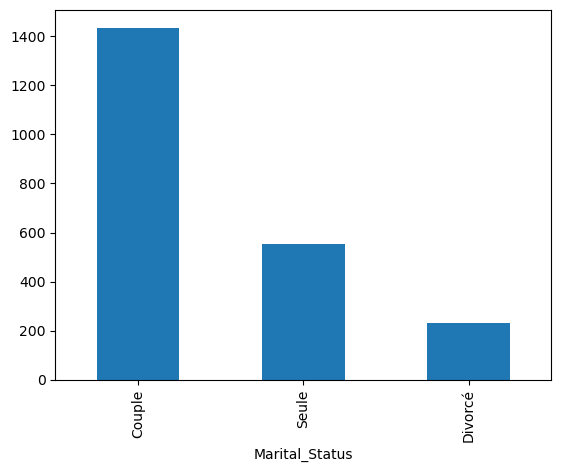

In [48]:
# Vérifier les modalités après modification
print(marketing['Marital_Status'].value_counts().plot(kind='bar'))

#### b) Kidhom / teenhome => Total_Enfants

In [49]:
marketing['Total_Enfants'] = marketing['Kidhome'].astype(int) + marketing['Teenhome'].astype(int)
marketing['Total_Enfants'] = marketing['Total_Enfants'].astype('category')

Axes(0.125,0.11;0.775x0.77)


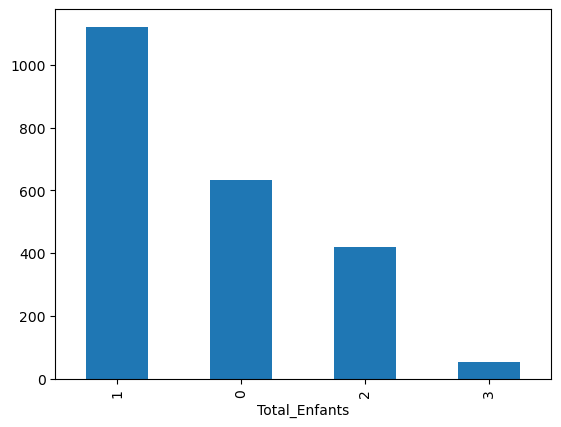

In [50]:
print(marketing['Total_Enfants'].value_counts().plot(kind='bar'))

In [51]:
marketing.drop(['Kidhome', 'Teenhome'], axis=1, inplace=True)

#### c) Education => Niveau d'étude

In [52]:
marketing['Niveau_Etude'] = marketing['Education'].replace({
    'Graduation': 'Moyen',  # Réunir Married et Together dans 'Couple'
    'PhD': 'Eleve',
    'Master': 'Eleve',  # Réunir Single, Alone, Widow dans 'Seule'
    '2n Cycle': 'Faible',
    'Basic': 'Moyen',
})

C:\Users\qtoui\AppData\Local\Temp\ipykernel_4924\203239674.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  marketing['Niveau_Etude'] = marketing['Education'].replace({


Axes(0.125,0.11;0.775x0.77)


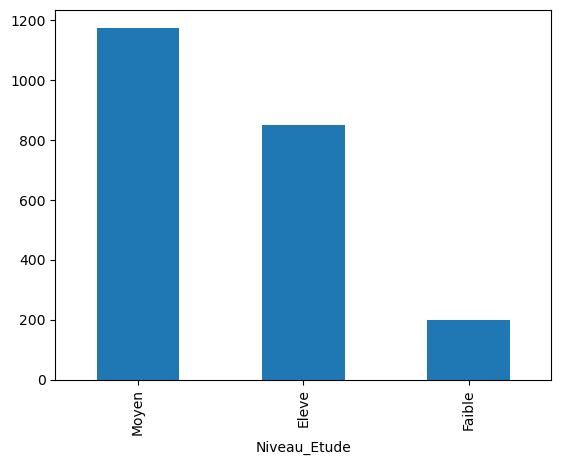

In [53]:
# Vérifier les modalités après modification
print(marketing['Niveau_Etude'].value_counts().plot(kind='bar'))

In [54]:
marketing.drop(['Education'], axis=1, inplace=True)

#### d) Nombre de campagnes acceptées

Cela peut tout de même nous être utile pour cibler des gens qui acceptent plusieurs fois des campagnes

In [55]:
marketing['Nbr_Cmp'] = marketing[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].apply(lambda x: x.cat.codes).sum(axis=1)

In [56]:
print(marketing['Nbr_Cmp'].value_counts())

Nbr_Cmp
0    1619
1     368
2     142
3      51
4      36
5      10
Name: count, dtype: int64


Une fois toutes les analyses et modifications effectuées, on vérifie à quoi ressemble un individu pris de façon aléatoire 

In [68]:
print(marketing.iloc[9])

ID                                    5899
Marital_Status                      Couple
Income                              5648.0
Dt_Customer            2014-03-13 00:00:00
Recency                                 68
MntWines                                28
MntFruits                                0
MntMeatProducts                          6
MntFishProducts                          1
MntSweetProducts                         1
MntGoldProds                            13
NumDealsPurchases                        1
NumWebPurchases                          1
NumCatalogPurchases                      0
NumStorePurchases                        0
NumWebVisitsMonth                       20
AcceptedCmp3                           Yes
AcceptedCmp4                            No
AcceptedCmp5                            No
AcceptedCmp1                            No
AcceptedCmp2                            No
Complain                                No
Response                                No
Age_Categor

On vérifie les valeurs duppliquées.

In [69]:
print(marketing.duplicated().sum())

0


## 3) Analyse descriptive bidimensionnelle

### 3.1) Comparaison quanti / quanti 

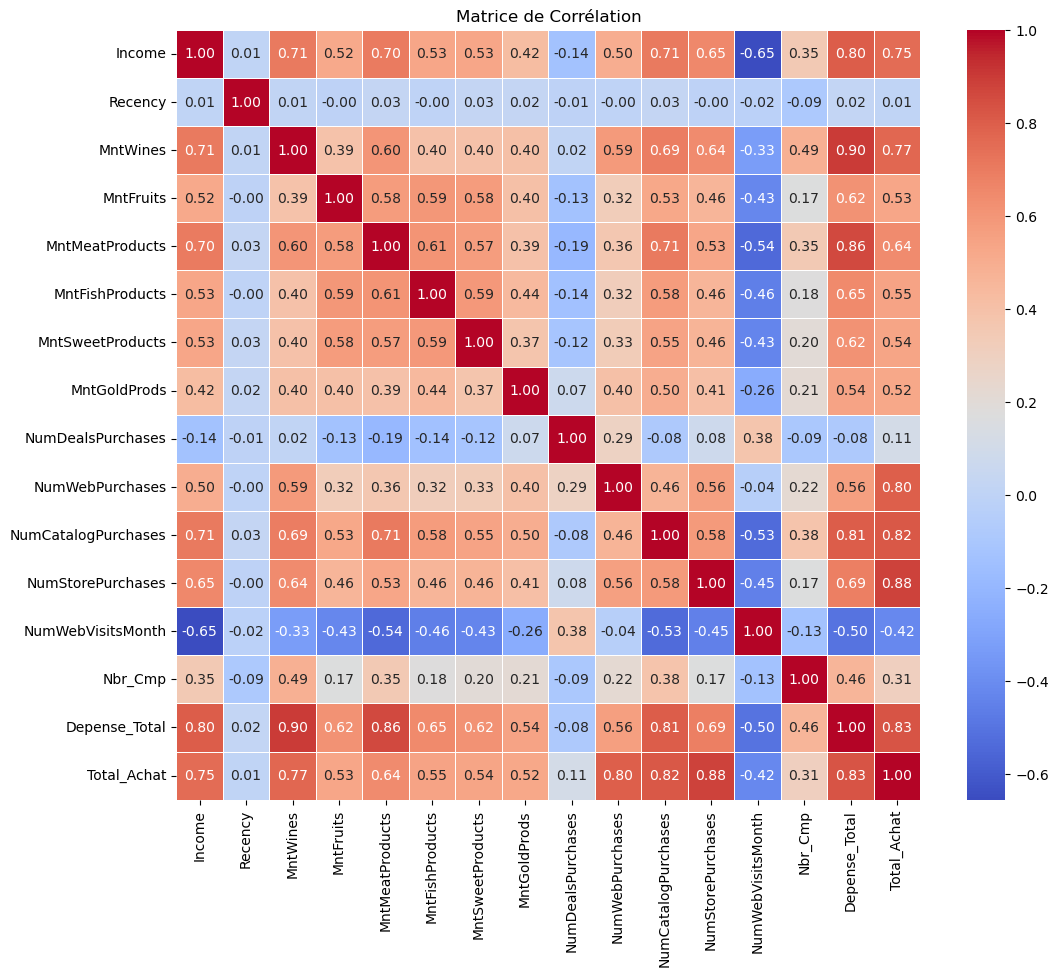

In [396]:
# Sélectionner uniquement les colonnes numériques (int64, float64)
numeric_columns = marketing.select_dtypes(include=['number']).drop(columns=['ID'])

# Calculer la matrice de corrélation
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation')
plt.show()

Income très corrélé avec total achat et total dépense => logique car plus on a d'argent, plus on peut se permettre d'acheter et de dépenser.

Income est aussi corréle avec les achats de vins et de viandes qui sont des achats généralement plus coûteux et que l'on peut se permettre de faire lorsque l'on a de l'argent.

Depense Total est très corrélé avec les aliments qui coutent cher vu qu'ils font monter "l'addition" (viande et vin). C'est aussi très corrélé avec le nbr d'achat car plus on achète plus on dépense.

Le nombre total d'achat est très corrélé avec le nbr d'acaht via catalogue, magasin et site web car il dépend directement de ces 3 variables la.

Il y a pleins d'autres analyses comme celles ci possibles qui sont plutôt simples et cohérentes.

On peut confirmer ces hypothèses à l'aide de scatter plot (en python on est obligé de dissocier scatter plot et corrélation car il n'y a pas d'équivalent de la fonction ggpair

On commence par afficher tous les scatter plot.

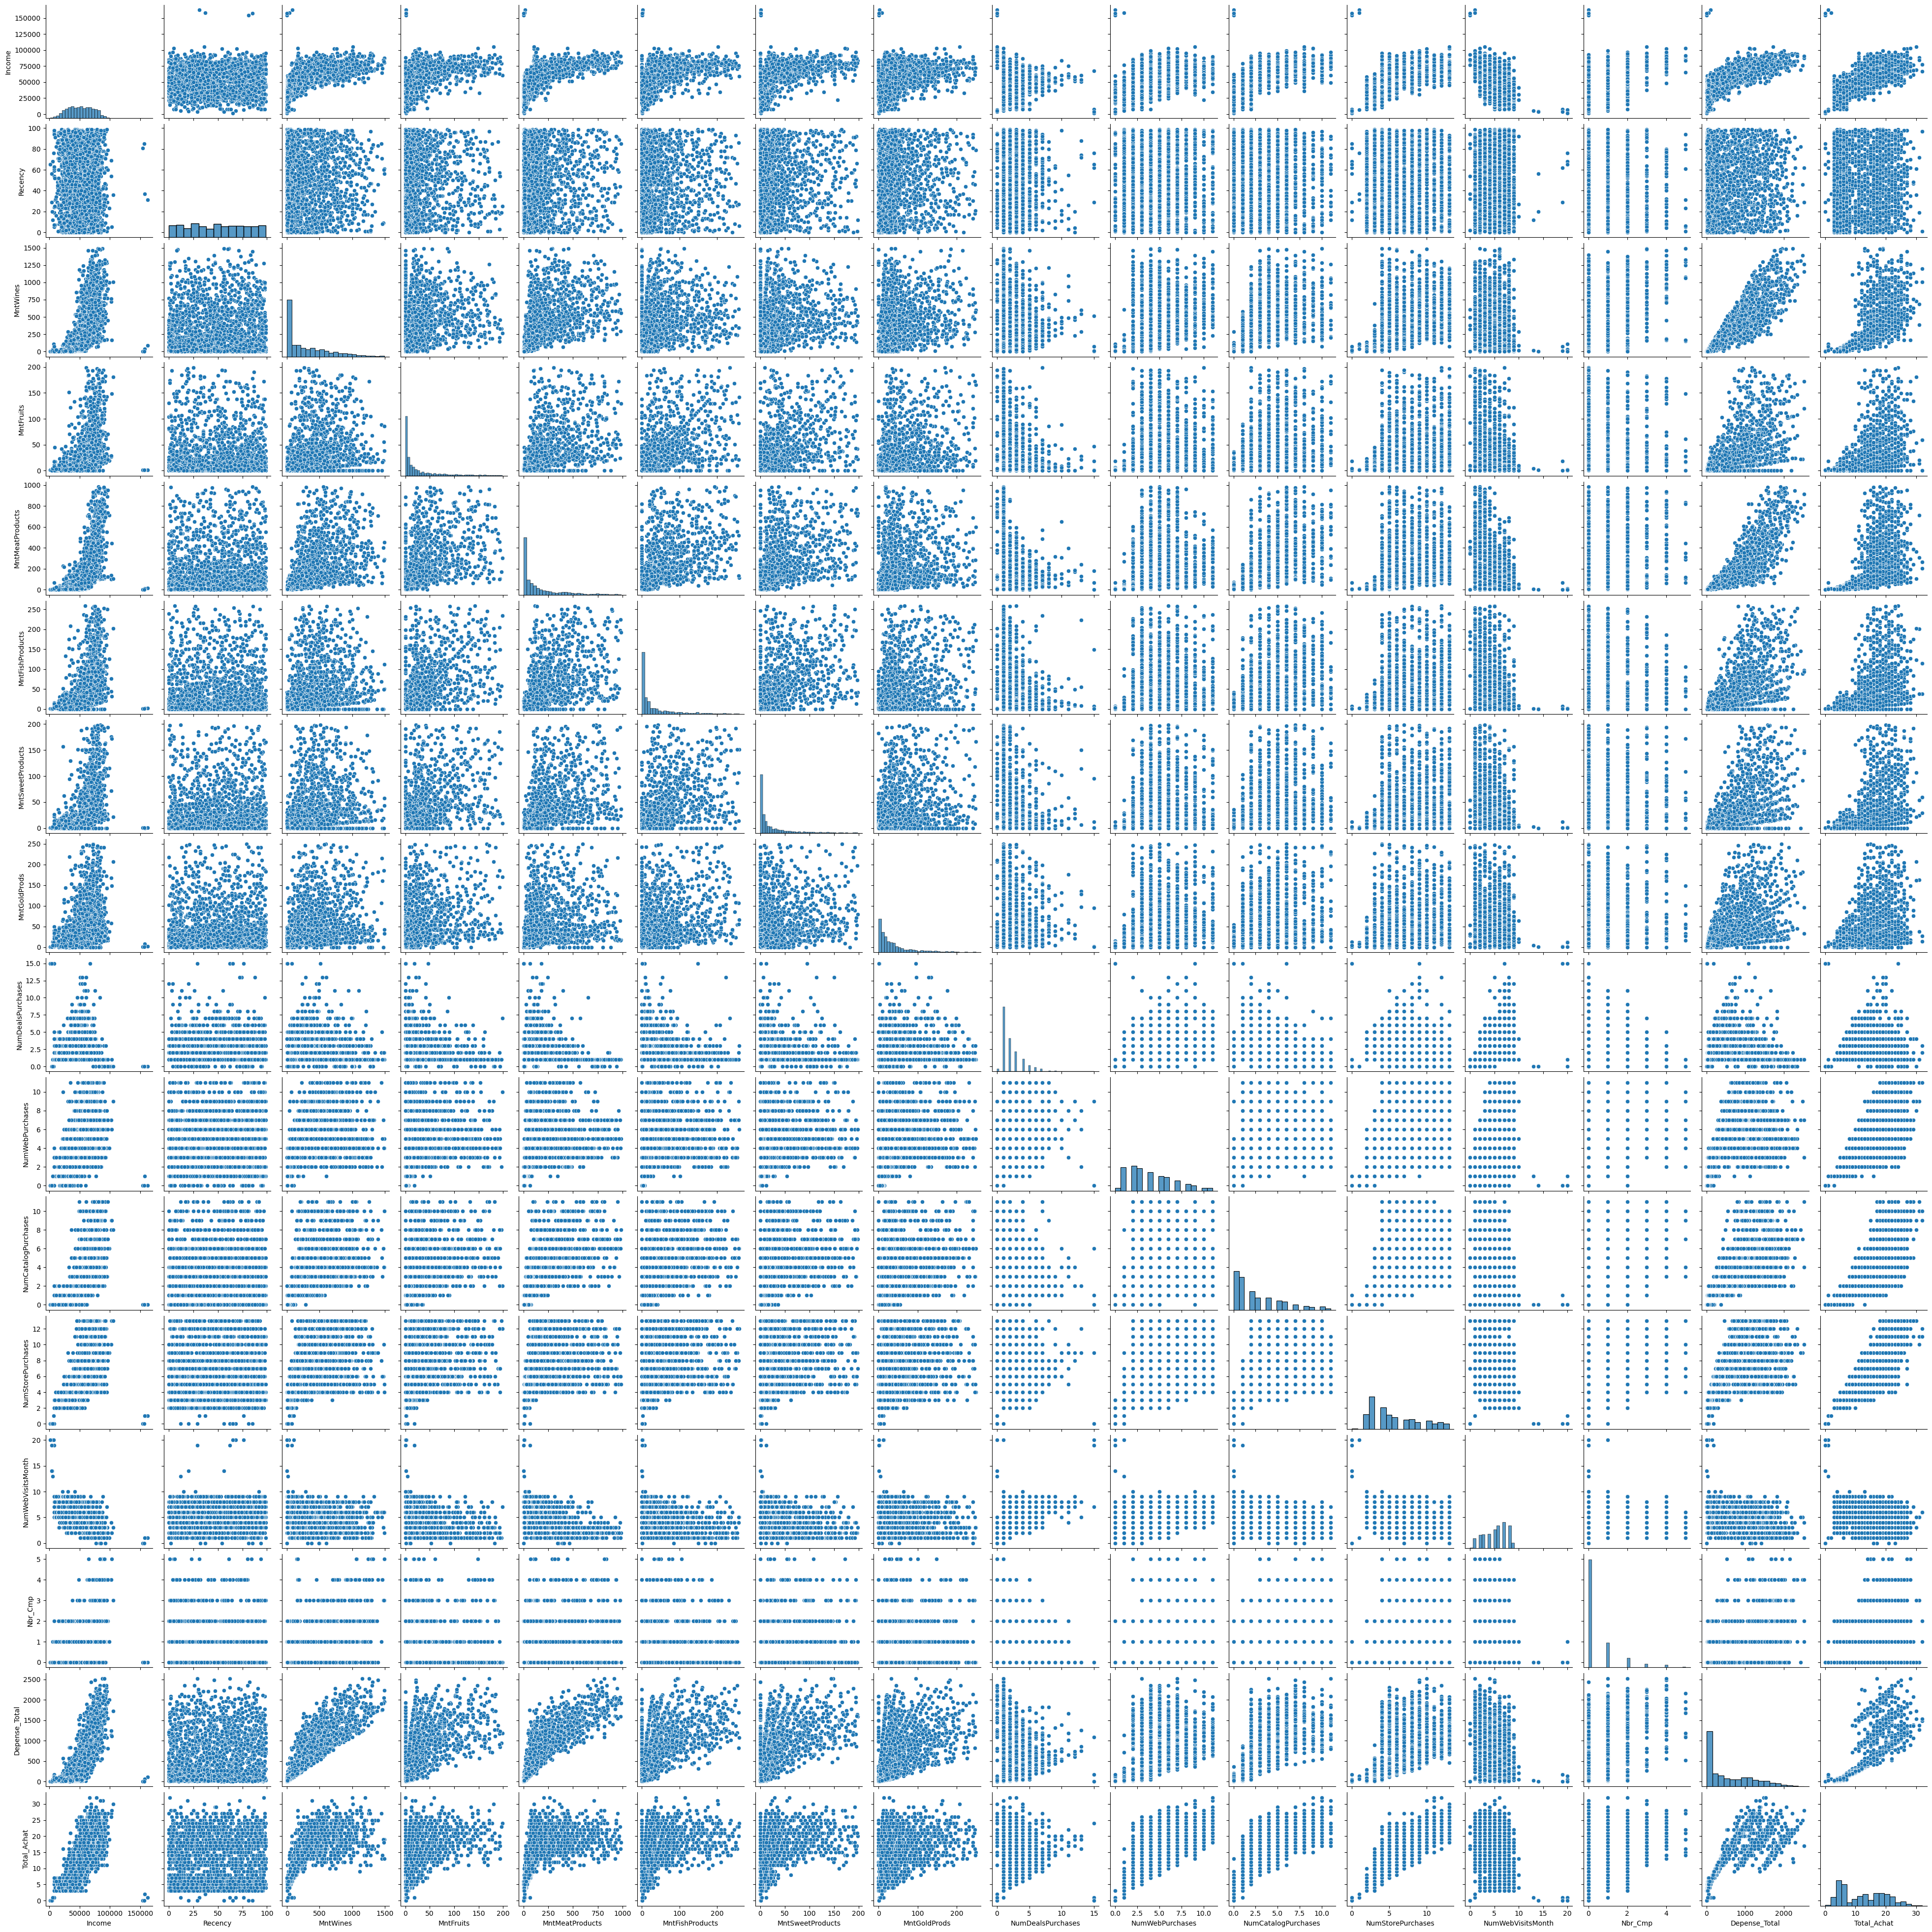

In [80]:
# Sélectionner uniquement les colonnes numériques (int64, float64)
numeric_columns = marketing.select_dtypes(include=['number']).drop(columns=['ID'])

sns.pairplot(numeric_columns)
plt.show()

Ce n'est pas très lisible donc on peut se focus sur ceux pour lesquels on a émis des hypothèses précédemment.

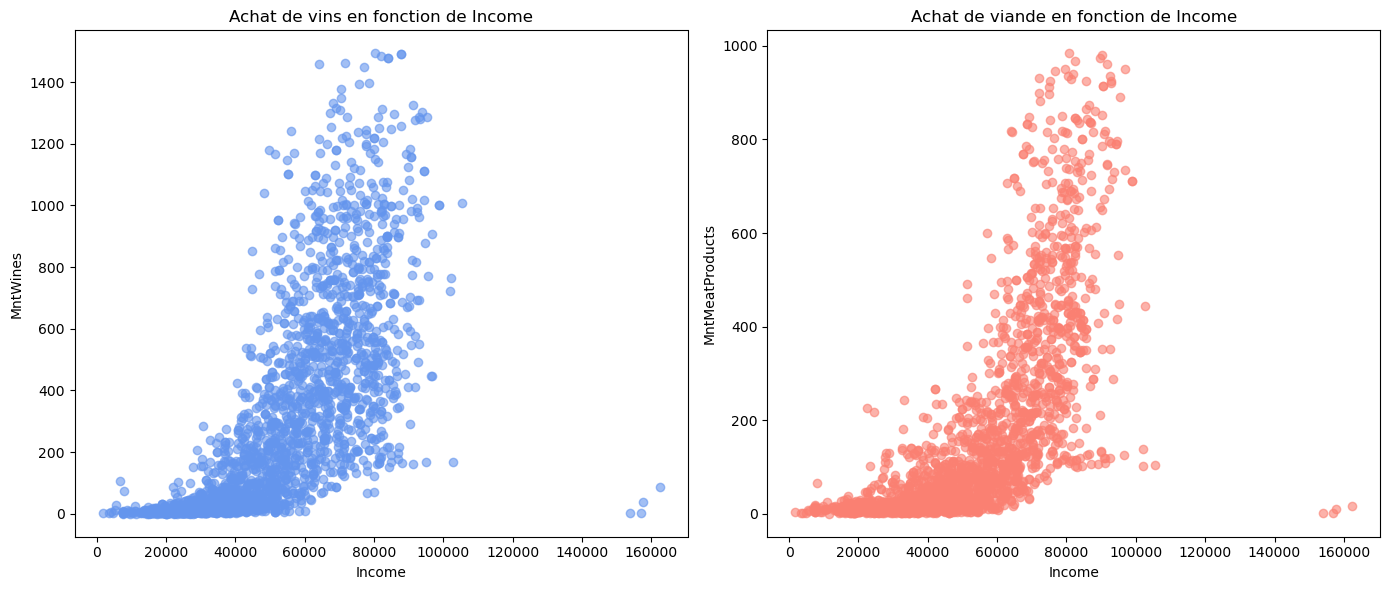

In [84]:
# Création de la figure avec 2 sous-graphes
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot Total_Achat en fonction de Income
axes[0].scatter(marketing['Income'], marketing['MntWines'], alpha=0.6, color='cornflowerblue')
axes[0].set_xlabel('Income')
axes[0].set_ylabel('MntWines')
axes[0].set_title('Achat de vins en fonction de Income')

# Scatter plot Depense_Total en fonction de Income
axes[1].scatter(marketing['Income'], marketing['MntMeatProducts'], alpha=0.6, color='salmon')
axes[1].set_xlabel('Income')
axes[1].set_ylabel('MntMeatProducts')
axes[1].set_title('Achat de viande en fonction de Income')

plt.tight_layout()
plt.show()

Résultat cohérent, les 4 points avec un salaire plus élevé sont des cas "exceptionnels" en terme de salaire et correspond aux point que l'on avait décider de garder. Ils ne sont pas dans la cohérence du graphe car il n'y a que 4 individus qui peuvent par exemple ne pas être des grands fans de viandes et de vins. Tout de même, on remarque qu'en moyenne, les gens qui achètent de la viande et du vin ont un salaire plus élevé.

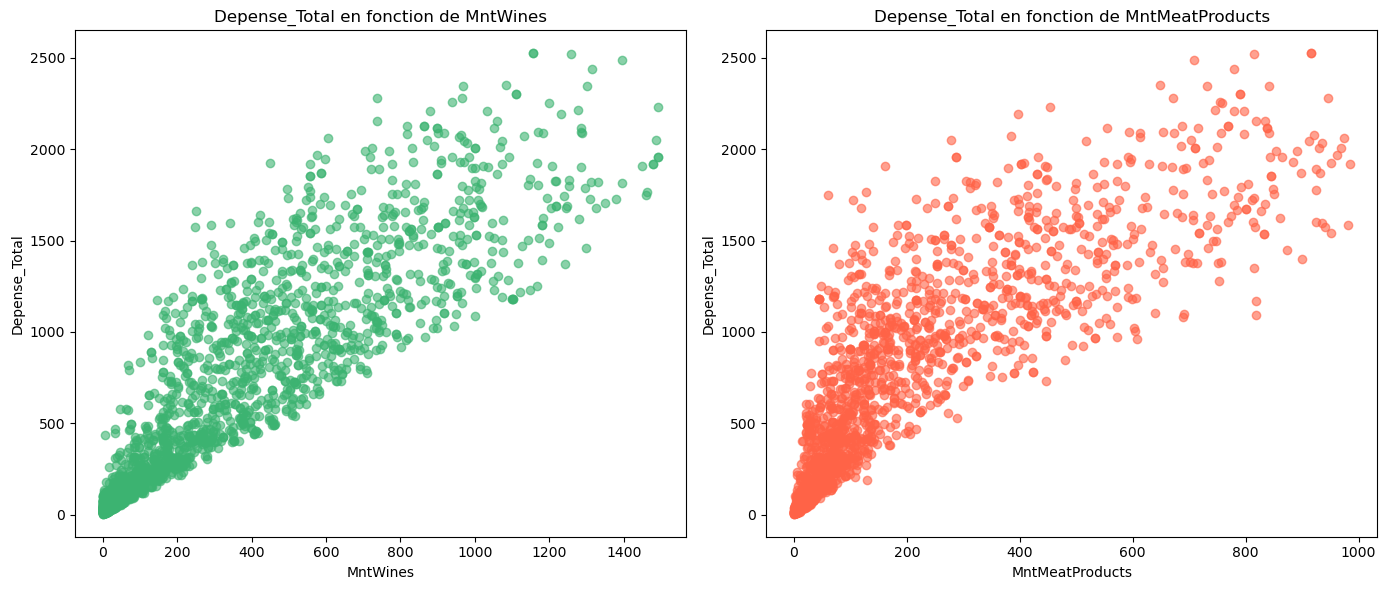

In [86]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot : Depense_Total vs MntWines
axes[0].scatter(marketing['MntWines'], marketing['Depense_Total'], alpha=0.6, color='mediumseagreen')
axes[0].set_xlabel('MntWines')
axes[0].set_ylabel('Depense_Total')
axes[0].set_title('Depense_Total en fonction de MntWines')

# Scatter plot : Depense_Total vs MntMeatProducts
axes[1].scatter(marketing['MntMeatProducts'], marketing['Depense_Total'], alpha=0.6, color='tomato')
axes[1].set_xlabel('MntMeatProducts')
axes[1].set_ylabel('Depense_Total')
axes[1].set_title('Depense_Total en fonction de MntMeatProducts')

plt.tight_layout()
plt.show()


Confirme notre hypothèse que les achats de vins et de viandes font augmenter le prix des dépenses car ce sont des produits couteux.

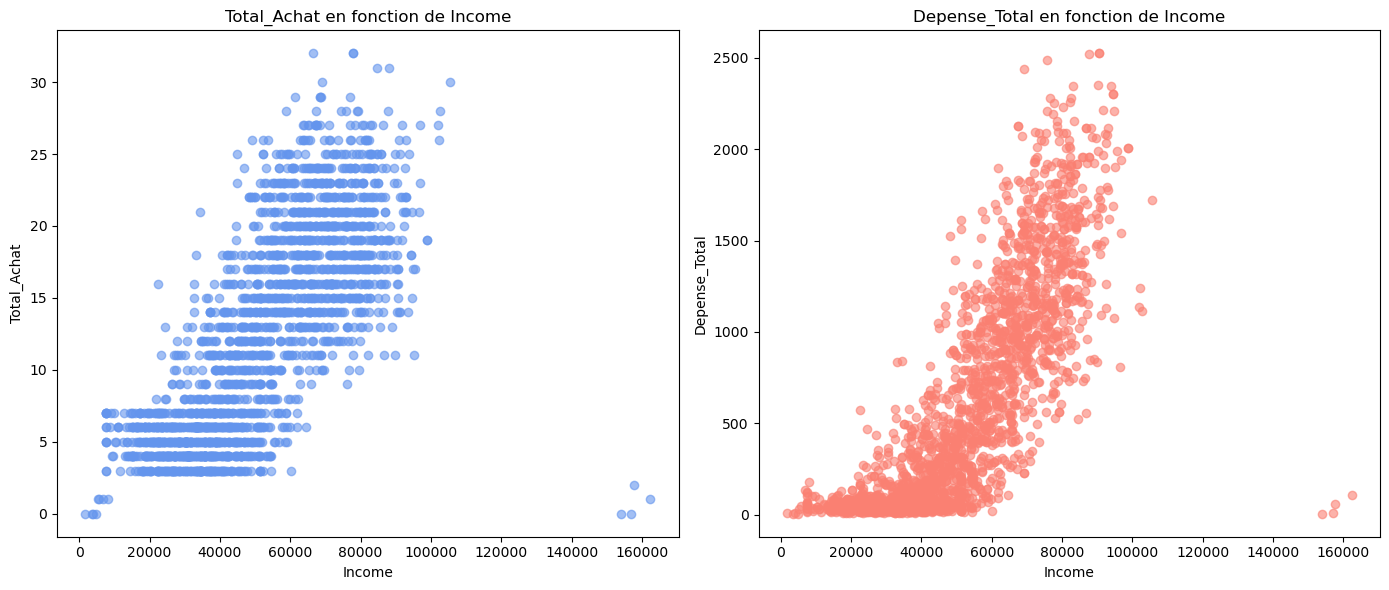

In [85]:
# Création de la figure avec 2 sous-graphes
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot Total_Achat en fonction de Income
axes[0].scatter(marketing['Income'], marketing['Total_Achat'], alpha=0.6, color='cornflowerblue')
axes[0].set_xlabel('Income')
axes[0].set_ylabel('Total_Achat')
axes[0].set_title('Total_Achat en fonction de Income')

# Scatter plot Depense_Total en fonction de Income
axes[1].scatter(marketing['Income'], marketing['Depense_Total'], alpha=0.6, color='salmon')
axes[1].set_xlabel('Income')
axes[1].set_ylabel('Depense_Total')
axes[1].set_title('Depense_Total en fonction de Income')

plt.tight_layout()
plt.show()

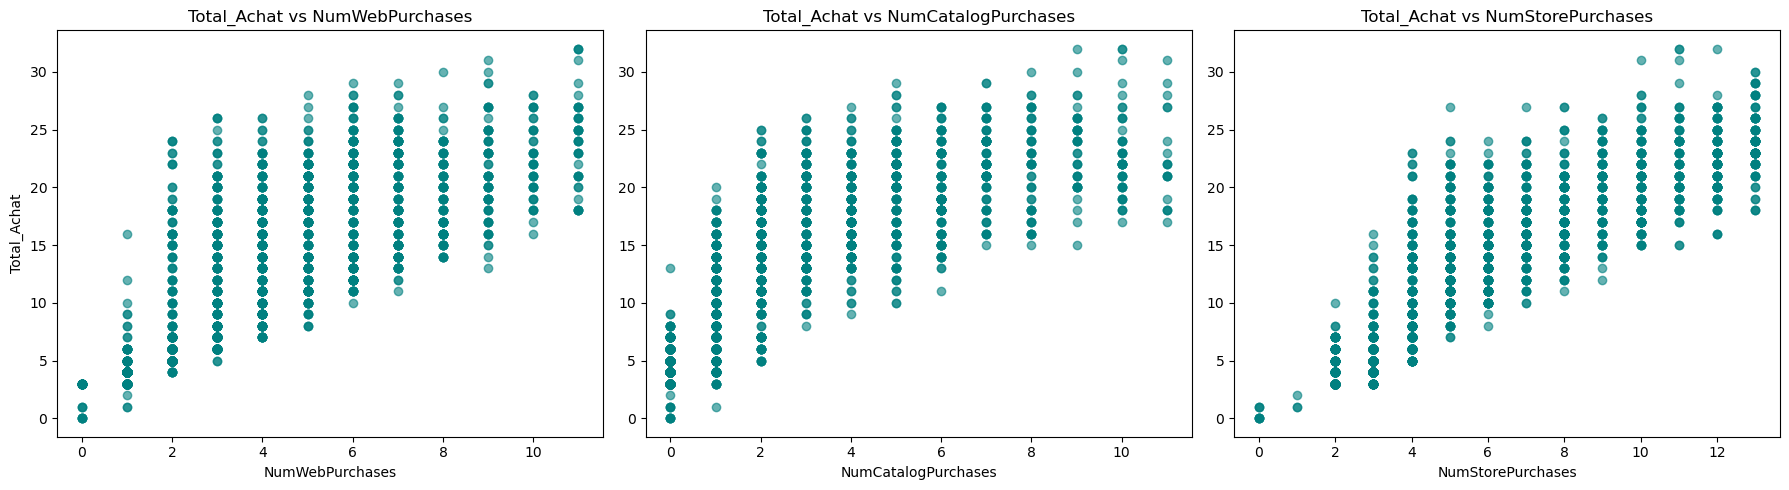

In [81]:
# Liste des variables à comparer à Total_Achat
x_vars = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

# Création de la figure avec 3 sous-graphes (1 ligne, 3 colonnes)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Boucle pour créer les scatter plots
for i, var in enumerate(x_vars):
    axes[i].scatter(marketing[var], marketing['Total_Achat'], alpha=0.6, color='teal')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Total_Achat' if i == 0 else "")
    axes[i].set_title(f'Total_Achat vs {var}')

plt.tight_layout()
plt.show()

### 3.2) Comparaison quali / quali 

On peut observer la dépendance entre 2 variables qualitatives à l'aide de plusieurs outils : tableau de contingence ou mosaic plot pour essayer d'observer ces dépendances ou alors directement un test de chi deux d'indépendances pour pouvoir conclure à l'aide de la p-valeur avec un certain niveau de risque.

On commence par faire une table de contingence

In [110]:
pd.crosstab(marketing['Marital_Status'], marketing['Niveau_Etude'])

Niveau_Etude    Faible  Moyen  Eleve
Marital_Status                      
Seule               41    306    208
Divorcé             22    120     89
Couple             137    749    550

Puis un exemple de mosaic plot.

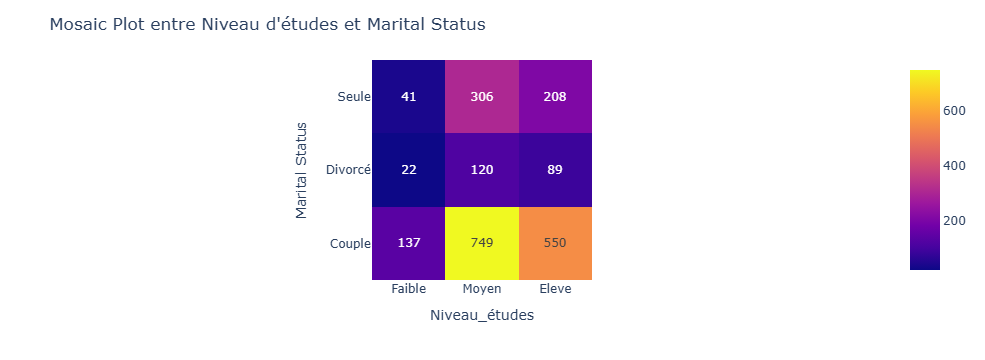

In [111]:
contingency_table = pd.crosstab(marketing['Marital_Status'], marketing['Niveau_Etude'])

# Créer le mosaic plot avec Plotly
fig = px.imshow(contingency_table, text_auto=True, labels={'x': 'Niveau_études', 'y': 'Marital Status'})
fig.update_layout(title="Mosaic Plot entre Niveau d'études et Marital Status")
fig.show()

Puis on effectue le test de chi deux d'indépendance au risque 5%

In [112]:
contingency_table = pd.crosstab(marketing['Marital_Status'], marketing['Niveau_Etude'])

# Effectuer le test du Khi-Deux
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Afficher les résultats du test
print(f"Khi-deux Statistique: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrés de liberté: {dof}")
print(f"Fréquences attendues: \n{expected}")

# Interpréter le p-value
if p_value < 0.05:
    print("Il y a une relation significative entre les variables.")
else:
    print("Aucune relation significative n'a été trouvée.")

Khi-deux Statistique: 2.935270814386988
P-value: 0.5687154600720442
Degrés de liberté: 4
Fréquences attendues: 
[[ 49.9549955  293.48559856 211.55940594]
 [ 20.79207921 122.15346535  88.05445545]
 [129.25292529 759.36093609 547.38613861]]
Aucune relation significative n'a été trouvée.


Pour éviter d'afficher toutes les mosaics plots, on crée ci-dessous une fonction qui va effectuer un test de chi deux pour chacune de nos variables qualitatives 2 à 2 et qui va retenir uniquement les tests pour lesquels la p-valeurs est inférieur à 0.05 i.e.: les variables pour lesquelles il y a une forte dépendance au risque 5%.

In [113]:
# Sélectionner uniquement les colonnes de type 'category'
qualitative_columns = marketing.select_dtypes(include=['category']).columns

# Créer une fonction pour effectuer le test de chi-deux
def chi2_test(dataframe, col1, col2):
    # Créer un tableau croisé (contingency table)
    contingency_table = pd.crosstab(dataframe[col1], dataframe[col2])
    
    # Effectuer le test du chi-deux
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    
    # Retourner le p-value du test
    return p

# Faire un test de chi-deux entre chaque paire de variables qualitatives
for i in range(len(qualitative_columns)):
    for j in range(i + 1, len(qualitative_columns)):
        col1 = qualitative_columns[i]
        col2 = qualitative_columns[j]
        
        # Effectuer le test et récupérer la p-value
        p_value = chi2_test(marketing, col1, col2)
        
        # Afficher uniquement si la p-value est inférieure à 0.05
        if p_value < 0.05:
            print(f"Test Chi-2 entre {col1} et {col2}: p-value = {p_value}")
            print(f"Il y a une relation significative entre {col1} et {col2}\n")

Test Chi-2 entre Marital_Status et Response: p-value = 1.3694460202595377e-11
Il y a une relation significative entre Marital_Status et Response

Test Chi-2 entre Marital_Status et Age_Categorie: p-value = 1.7115296444528026e-09
Il y a une relation significative entre Marital_Status et Age_Categorie

Test Chi-2 entre Marital_Status et Total_Enfants: p-value = 0.01144992752776499
Il y a une relation significative entre Marital_Status et Total_Enfants

Test Chi-2 entre AcceptedCmp3 et AcceptedCmp4: p-value = 0.000306413114862872
Il y a une relation significative entre AcceptedCmp3 et AcceptedCmp4

Test Chi-2 entre AcceptedCmp3 et AcceptedCmp5: p-value = 0.0002674539911450115
Il y a une relation significative entre AcceptedCmp3 et AcceptedCmp5

Test Chi-2 entre AcceptedCmp3 et AcceptedCmp1: p-value = 1.825209380544493e-05
Il y a une relation significative entre AcceptedCmp3 et AcceptedCmp1

Test Chi-2 entre AcceptedCmp3 et AcceptedCmp2: p-value = 0.002394017510871413
Il y a une relation s

On prend un cas où il y a une dépendance entre les variables et on vérifie son mosaic plot et son test de chi deux.

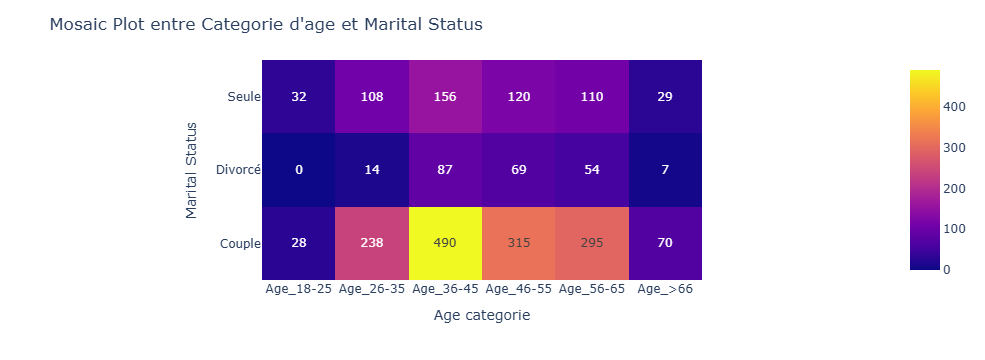

Khi-deux Statistique: 61.718577749179424
P-value: 1.7115296444528026e-09
Degrés de liberté: 10
Fréquences attendues: 
[[ 14.98649865  89.9189919  183.08505851 125.88658866 114.64671467
   26.47614761]
 [  6.23762376  37.42574257  76.2029703   52.3960396   47.71782178
   11.01980198]
 [ 38.77587759 232.65526553 473.7119712  325.71737174 296.63546355
   68.50405041]]


In [115]:
contingency_table = pd.crosstab(marketing['Marital_Status'], marketing['Age_Categorie'])

# Créer le mosaic plot avec Plotly
fig = px.imshow(contingency_table, text_auto=True, labels={'x':'Age categorie', 'y': 'Marital Status'})
fig.update_layout(title="Mosaic Plot entre Categorie d'age et Marital Status")
fig.show()

# Effectuer le test du Khi-Deux
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Afficher les résultats du test
print(f"Khi-deux Statistique: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrés de liberté: {dof}")
print(f"Fréquences attendues: \n{expected}")

### 3.3) Comparaison quanti / quali 

On s'intéresse maintenant aux effets d’une catégo sur une variable quantitative. Pour cela on peut commencer par faire des boxplots croisés qui nous permettent de visualiser la distribution d’une variable quantitative pour chaque modalité de la variable qualitative

<Axes: xlabel='Marital_Status', ylabel='Income'>

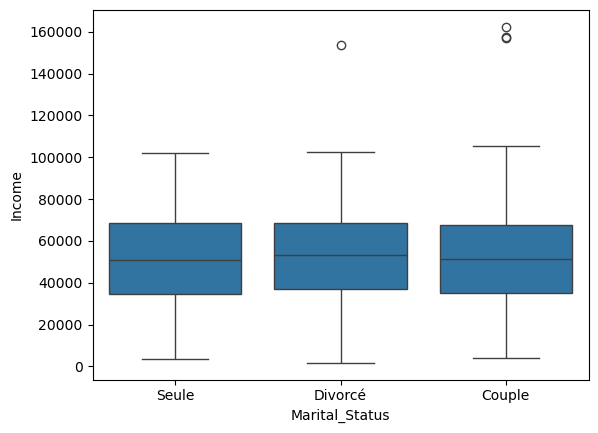

In [116]:
sns.boxplot(x='Marital_Status', y='Income', data=marketing)

Comment l'interpréter : 
- Si les médianes diffèrent beaucoup → possible effet de la quali sur la quanti.
- Si les boîtes sont très différentes en forme ou en taille → distributions différentes (hétérogénéité).

On peut aussi faire un violin plot qui est une extension du boxplot qui montre aussi la densité des données

<Axes: xlabel='Marital_Status', ylabel='Income'>

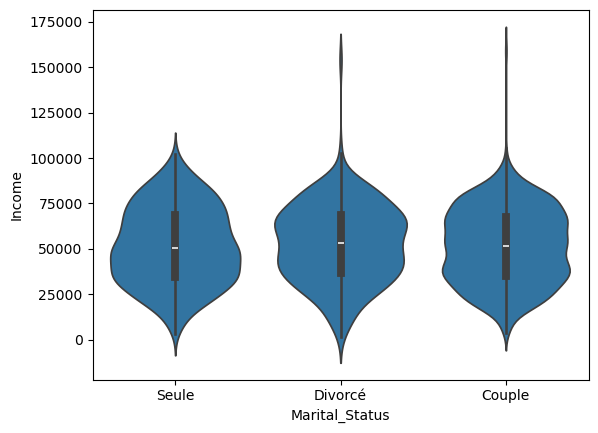

In [117]:
sns.violinplot(x='Marital_Status', y='Income', data=marketing)

Comment l'interpréter : 
- idem que pour les boxplots 
- Les zones plus larges montrent où les données sont plus concentrées
- on peut voir si les distributions sont symétriques ou biaisées, ou s’il y a des pics multiples

On peut aussi afficher les moyennes et écarts-types par groupe afin de résumer numériquement la distribution de la variable quantitative pour chaque modalité de la variable qualitative.

In [118]:
marketing.groupby('Marital_Status')['Income'].mean()

C:\Users\qtoui\AppData\Local\Temp\ipykernel_4924\2434241383.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Marital_Status
Seule      51743.402703
Divorcé    52904.333333
Couple     51722.627089
Name: Income, dtype: float64

Comment l'interpréter : 
- Si les moyennes sont très différentes → effet probable du facteur.
- Si les écarts-types varient → variance inégale entre groupes (important à noter pour choisir les tests).